In [1]:
#Lapsed donors on this dataset are from the promotion nº 2, 17NK (from Forums)
#data['RFA_2R'].value_counts()

# Data Mining Project

## Import and assessing data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
import math

In [3]:
#goes to the previous folder, accesses the data folder, and gets the path to the donors.csv file (this is done bc the is
#too large to upload on GitHub)
path = os.path.join('..', 'data', 'donors.csv')

data = pd.read_csv(path, sep = ',')

data.head()

C:\Users\ruifi\anaconda3\envs\DMclasses\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [4]:
# Get a copy of the original dataset
data_original = data.copy()

In [5]:
# Optional -> to check all the rows and columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
# Dimension of the dataset
data.shape

(95412, 476)

In [7]:
# Data types of the variables and columns
data.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [8]:
# Summary Statistics of our variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,95412,NaN,NaN,NaN,47705.5,27543.2,0,23852.8,47705.5,71558.2,95411
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
RFA_2A,95412,4,F,46964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_R,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_F,95412,4,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD_A,95412,5,X,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Info on the donors dataset
data.info(max_cols=476)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 476 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95412 non-null  int64  
 1   ODATEDW     95412 non-null  object 
 2   OSOURCE     95412 non-null  object 
 3   TCODE       95412 non-null  int64  
 4   STATE       95412 non-null  object 
 5   ZIP         95412 non-null  object 
 6   MAILCODE    95412 non-null  object 
 7   PVASTATE    95412 non-null  object 
 8   DOB         71529 non-null  object 
 9   NOEXCH      95412 non-null  object 
 10  RECINHSE    95412 non-null  object 
 11  RECP3       95412 non-null  object 
 12  RECPGVG     95412 non-null  object 
 13  RECSWEEP    95412 non-null  object 
 14  MDMAUD      95412 non-null  object 
 15  DOMAIN      95412 non-null  object 
 16  HOMEOWNR    95412 non-null  object 
 17  CHILD03     95412 non-null  object 
 18  CHILD07     95412 non-null  object 
 19  CHILD12     95412 non-nu

In [10]:
# Check duplicates
any(data.duplicated())

False

In [11]:
# Count of missing values
data.isna().sum()

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

## Data Treatment

In [12]:
# Ver no coherence:
# O LASTDATE é o resumo das campanhas, mas como a ultima data das campanhas está, várias vezes, incoerente com as RDATE, e
# e tendo em conta que estas têm muitos missing values (algumas mais de 70%), decidimos dropar as RDATE. Assumimos, tbm, 
# que há muitos valores que podem ter sido inseridos manualmente, o que leva às incoerências.

In [13]:
#CONTROLN: stays as index of the dataset
data.set_index('CONTROLN', inplace=True)

In [14]:
#Problema pa depois:

#put aside the variables that are already related to a PVA's clustering, and may be used in the end to compare it to our
#solution...:
donors_pva_cluster = data[['MDMAUD', 'DOMAIN', 'GEOCODE', 'PEPSTRFL']].copy()

#MDMAUD: RFA field, already a clustering from the organization

#put this aside because it is clustering (this one is a bit different from the RFA variables)
#donors_pva_cluster.replace({'DOMAIN' : {' ' : np.nan}}, inplace = True)

#GEOCODE is what? Put aside for now - clustering
#donors_pva_cluster.replace({'GEOCODE' : {' ' : np.nan}}, inplace = True)

#probably put aside! bc it's related to RFA
#donors_pva_cluster.replace({'PEPSTRFL' : {'X' : '1', ' ' : '0'}}, inplace = True)

rfa1 = data.loc[:, 'RFA_2':'RFA_24'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa1, left_index=True, right_index=True)
#from RFA_2 to RFA_24: these are variables with a clustering solution from PVA; don't use them for now (maybe use them
#in the end to compare with our own clustering solution)

rfa_and_mdmaud = data.loc[:, 'RFA_2R':'MDMAUD_A'].copy()
donors_pva_cluster = pd.merge(donors_pva_cluster, rfa_and_mdmaud, left_index=True, right_index=True)
#RFA_2R, RFA_2F, RFA_2A are related to RFA (put aside for now?)
#MDMAUD_R, MDMAUD_F, MDMAUD_A are related to RFA (put aside for now?)

donors_pva_cluster.head()

,MDMAUD,DOMAIN,GEOCODE,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95515,XXXX,T2,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,4,E,X,X,X
148535,XXXX,S1,02,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,2,G,X,X,X
15078,XXXX,R2,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,4,E,X,X,X
172556,XXXX,R2,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,4,E,X,X,X
7112,XXXX,S2,,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,2,F,X,X,X


In [15]:
#drop these:
data.drop(columns = ['Unnamed: 0',
                     'NOEXCH',
                     'WEALTH1',
                     'DATASRCE',
                     'LIFESRC'], inplace = True)

#Unnamed: 0: it has indexes from 0 to 95412, it's redundant

#NOEXCH: this var. has inconsistencies with the metadata available, as there's no reference to '0', '1', 0 or 1 values
#BELO - COHERENCE
#drop this! (incoherent, bc the variable has many incoherences with the metadata -> explicar melhor no relatório)
#data['NOEXCH'].value_counts()

#WEALTH1 has similar values to WEALTH2 but the metadata does not specify what is the variable, so we decided to keep
#the WEALTH2, which is well described
#data = data.astype({"WEALTH1": object})
#data['WEALTH1'].unique()

#data['DATASRCE'].unique()
#data.replace({'DATASRCE' : {' ' : np.nan}}, inplace = True)
#says which was the source of the data in this section of variables; it has 21280 ' ' (blanks)
#DROP! bc the variable is not very useful for interpreting the clusters (we are not sure about what are the values 
#representing... companies? we could not find on the internet)

#LIFESRC: same as DATASRCE...
#data['LIFESRC'].value_counts()
#data.replace({'LIFESRC' : {' ' : np.nan}}, inplace = True)
#says which was the source of the data in this section of variables; it has 54032 ' ' (blanks)
#DROP! bc the variable is not very useful for interpreting the clusters (we are not sure about what are the values 
#representing... companies? we could not find on the internet)

#We decided to drop all ADATE_x; RDATE_x and RAMNT_x bc they are incoherent with the summary variables.
#The code showing why we think these are incoherent is on the Coherence Check phase.

# Drop all 'ADATE_x'
data = data.drop(columns = data.loc[:,'ADATE_2':'ADATE_24'].columns)

# Drop all 'RDATE_x' and all 'RAMNT_x'
data = data.drop(columns = data.loc[:,'RDATE_3':'RAMNT_24'].columns)

In [16]:
#drop variables on the extra dataframe that has the clustering from PVA (donors_pva_cluster)
data.drop(columns = donors_pva_cluster.columns, inplace = True)

In [17]:
#note -> 'NUMCHLD' : int, altough it cannot be converted due to NaNs (float)!
data = data.astype({'TCODE': object, 
                    'INCOME': object,
                    'WEALTH2': object,
                    'MSA': object,
                    'ADI': object,
                    'DMA': object,
                    'HPHONE_D': object})

#INCOME: from the Forums: 7 corresponds to the highest income group and 0 to the lowest one

#MSA has values 0, which is not a MSA code. After researching what does this code represent in the US census, we assume 
#those 0s are for the doners that do not live in a metropolitan statistical area (MSA), a region with at least one 
#urbanized area and a minimum population of 50 000 (Investopedia); so those people may live in towns or rural areas.

#ADI has values 0, which is not an ADI code. After researching what does this code represents, we assume 
#those 0s are for the doners that do not live in a radio or television market region in which that specific population 
#receives the same programming (https://www.insightsassociation.org/issues-policies/glossary/area-dominant-influence-adi);
#this is related to marketing, and those people may live in regions that are not assigned to a code (but this is not a 
#missing value!).

#DMA has values 0, which is not a DMA code. After researching what does this code represents, we assume 
#those 0s are for the doners that do not live in a geographic area in the United States in which local television viewing 
#is measured by Nielsen (https://www.nielsen.com/us/en/intl-campaigns/dma-maps/#:~:text=DMA%20(Designated%20Market%20Area)%20regions,geographic%20areas%20within%20their%20business.)
#again, this code is related to marketing, and those people may live in regions that are not assigned to a code (but this 
#is not a missing value!).

#HPHONE_D is binary (0 or 1)

In [18]:
#dates as string, now as datetimes
#note -> errors='coerce' as in the vast majority of records (if not always) the errors on the to_datetime function are
#rased because the string in the column is empty, thus there isn't a date there; this leads to an error, and with this
#argument definition, the invalid parsing will be set as NaT (Not a Time), which is what we intend (missing values stay
#missing)
data['ODATEDW'] = pd.to_datetime(data['ODATEDW'])
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
#data.loc[:, 'ADATE_2':'ADATE_24'] = data.loc[:, 'ADATE_2':'ADATE_24'].apply(pd.to_datetime, errors='coerce') #from ADATE_2 until ADATE_24
data['MAXADATE'] = pd.to_datetime(data['MAXADATE'])
#data.loc[:, 'RDATE_3':'RDATE_24'] = data.loc[:, 'RDATE_3':'RDATE_24'].apply(pd.to_datetime, errors='coerce') #from RDATE_3 until RDATE_24
data['MINRDATE'] = pd.to_datetime(data['MINRDATE'])
data['MAXRDATE'] = pd.to_datetime(data['MAXRDATE'])
data['LASTDATE'] = pd.to_datetime(data['LASTDATE'])
data['FISTDATE'] = pd.to_datetime(data['FISTDATE'], errors='coerce')
data['NEXTDATE'] = pd.to_datetime(data['NEXTDATE'], errors='coerce')

In [19]:
#to remove the hyphen from the end of the ZIP codes (US zip codes are not supposed to have hyphens, but some do!)
data['ZIP'] = data['ZIP'].map(lambda x: x.replace('-', ''))

#now, the replace: on some vars. swap a blank space for a NaN, on binaries swap the letters for '0' and '1', etc
data.replace({'OSOURCE' : {' ' : np.nan},
                'MAILCODE' : {' ' : '0', 'B' : '1'},
                'PVASTATE' : {' ' : 'N'}, #N = state is not served by any organization
                'RECINHSE' : {' ' : '0', 'X' : '1'},
                'RECP3' : {' ' : '0', 'X' : '1'},
                'RECPGVG': {' ' : '0', 'X' : '1'},
                'RECSWEEP': {' ' : '0', 'X' : '1'},
                'HOMEOWNR' : {' ' : '0', 'H' : '1', 'U' : '0'}, #we assume the blank space on this variable says that it is unknown wether the donor has or not a home (so, we joined it with the 0-Unkwown)
                'CHILD03' : {' ' : 'N'}, #the ' ' (blank) will be replaced by 'N' (N = None), as we assume the blank space in this variable means the donor has no 
                'CHILD07' : {' ' : 'N'}, #children in that specific range of ages
                'CHILD12': {' ' : 'N'},  #note: more than 90 000 records have None, on each of these 4 variables
                'CHILD18': {' ' : 'N'},
                'NUMCHLD': {np.nan : 0}, #assuming NaN is zero, bc there is no zero on this variable!?
                'GENDER' : {' ' : 'U', 'A' : 'U', 'C' : 'U'}, #Incoherence (Belo!) -> nem que se fale só no relatório!
                                                             #values 'A' (2 of them) & 'C' (2) are not described on the metadata, most probably those are errors
                                                             #we assume the blank spaces, As and Cs can be assumed to be Unkwown
                'SOLP3' : {' ' : 'Default'},
                'SOLIH' : {' ' : 'Default'}, #feature engineering: create a binary with -> 0 (can't be mailed), 1 (can be mailed)
                'MAJOR' : {' ' : '0', 'X' : '1'},
                'GEOCODE2' : {' ' : np.nan}}, inplace = True)

#assuming Y = Yes and N = No, on all these vars
data.loc[:, 'COLLECT1':'PLATES'] = data.loc[:, 'COLLECT1':'PLATES'].replace({'Y' : '1', ' ' : '0'}) #from COLLECT1 to PLATES

In [20]:
#after the previous cell, we can put NUMCHLD as int:
data = data.astype({'NUMCHLD': int})

data['NUMCHLD'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [21]:
#PROBLEM on HHP1 and HHP2: "Median Person Per Household" and "Average Person Per Household" but the values are bery high
#if we interpret this as the median/average number of people living in a household of the neighborhood, then it should
#have values between 1, 2 or 3. Not 100-700. (Incoherence - Belo?)



#perguntar ao professor!!
#decisão final: (nota: ainda há alguns valores iguais a 0)
data['HHP1'] = data['HHP1'] / 100
data['HHP2'] = data['HHP2'] / 100

In [22]:
#RHP1 to RHP4 are kinda weird (Housing Unit??)



#perguntar ao professor: média/mediana das pessoas ser tão alto (50?); ou a descrição da variável não está correta?
#decisão final: we assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
#files), so we divided this columns by 10, for the values to make more "sense"
data['RHP1'] = data['RHP1'] / 10
data['RHP2'] = data['RHP2'] / 10
data['RHP3'] = data['RHP3'] / 10
data['RHP4'] = data['RHP4'] / 10

In [23]:
#EC1: "Median Years of School Completed by Adults 25+" has minimum 89 and maximum 170... are the values wrong?

#HC1: "Percent Median Length of Residence" is percent and median at the same time? And has values of 0 length! Is it the 
#median time someone has been living in their current home, in years? Very ambiguous:
#HC2: this one has a less ambiguous description but it still says "Percent Median" so is it a percentage or a median? 
#it is confusing


#perguntar ao professor: EC1 (mediana de 170 anos a estudar?):
#decisão final: divided by 10, because 8.9 (min) and 17.0 (max) are values that make more sense
#we assume this values were multiplied by 10 to avoid storing floats (floats make up more space on data
#files), so we divided this columns by 10, for the values to make more "sense"
data['EC1'] = data['EC1'] / 10
#HC1 e HC2 -> we assume this is a median, the "percent" is probably a typo on the metadata descriptions

After the Data Treatment:

In [24]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,RECINHSE,RECP3,RECPGVG,RECSWEEP,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,HPHONE_D,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95515,2009-01-01,GRI,0,IL,61081,0,N,1957-12-01,0,0,0,0,0,N,N,N,N,0,NaN,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,Default,Default,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,1.98,2.76,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,5.8,6.1,1.5,0.4,2,0,0,14,1,0,0,2,5,17,73,0,177,682,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,12.0,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,2017-02-01,74,6,14,240.0,31,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,0,C
148535,2014-01-01,BOA,1,CA,91326,0,N,1972-02-01,0,0,0,0,1,N,N,N,M,1,6,M,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,Default,Default,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,3.17,3.60,99,99,0,0,0,0,0,0,0,5468

In [25]:
data.info(max_cols=370)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 370 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ODATEDW   95412 non-null  datetime64[ns]
 1   OSOURCE   94484 non-null  object        
 2   TCODE     95412 non-null  object        
 3   STATE     95412 non-null  object        
 4   ZIP       95412 non-null  object        
 5   MAILCODE  95412 non-null  object        
 6   PVASTATE  95412 non-null  object        
 7   DOB       71529 non-null  datetime64[ns]
 8   RECINHSE  95412 non-null  object        
 9   RECP3     95412 non-null  object        
 10  RECPGVG   95412 non-null  object        
 11  RECSWEEP  95412 non-null  object        
 12  HOMEOWNR  95412 non-null  object        
 13  CHILD03   95412 non-null  object        
 14  CHILD07   95412 non-null  object        
 15  CHILD12   95412 non-null  object        
 16  CHILD18   95412 non-null  object        
 17  NUMCHL

In [26]:
#'HIT' is good to go

In [27]:
#from MBCRAFT to PUBOPP, it all looks good; but it has many missing values!

In [28]:
#from MALEMILI to FEDGOV there are no MVs and everything is fine (check for incoherences: percentages below 0 or 
#above 100?)

In [29]:
#from POP901 until the end of this set of variables, we assume 0s in the first three (Number of Persons, Families and 
#Households) represent people that live in rural areas and small towns, with no one living near them (in the neighborhood)

#gets resolved when we do data = data[data['AGE902'] != 0] (Coherence checks!)

In [30]:
#from POP901 until ETH16, everything looks fine

In [31]:
#PROBLEM on HV1 & HV2: "Median Home Value in hundreds" has values of 0, and then, the second lowest, 75 (which means 7500) 
#the values of 0 are 318 records - same on HV2



#perguntar ao professor: nestas variáveis, assumimos que os 0s são missings, incoerências, ou representam casas alugadas.
#decisão final:
#assumption -> there were homes with very low market values, so when the values where divided by 100 to get the value for 
#the column, it was so close to 0 that the int was 0

In [32]:
#HV3 and HV4, related to rents, also have values 0 but that can mean the people are not paying any rent (maybe they bought
#the house already, or maybe they live with family members and are not paying, etc)

In [33]:
#IC1-IC5: values 0 -> don't declare anything to the state?

In [34]:
#data['TPE10'] has values of 0: people that work at home or live very near to the company/office/...

In [35]:
#from RAMNT_3 until RAMNT_24 -> explicado na parte do Tomás

## Creation of new variables (before Feature Engineering)

We need it for the outlier removal and for the MVs (dates in days or years), bc it is more straightforward than working with datetimes (also for the visualizations).

In [36]:
data['ODATEDW_days'] = (datetime(2020, 1, 1) - data['ODATEDW']).dt.days

#AGE needs to be int after being imputed
data['AGE'] = ((datetime(2020, 1, 1) - data['DOB']).dt.days / 365).map(lambda x: math.floor(x) if math.isnan(x) == False else x)

#from ADATE_2 until ADATE_24 -> these will be droped

data['MAXADATE_days'] = (datetime(2020, 1, 1) - data['MAXADATE']).dt.days

#from RDATE_3 until RDATE_24 -> these will be droped

data['MINRDATE_days'] = (datetime(2020, 1, 1) - data['MINRDATE']).dt.days

data['MAXRDATE_days'] = (datetime(2020, 1, 1) - data['MAXRDATE']).dt.days

data['LASTDATE_days'] = (datetime(2020, 1, 1) - data['LASTDATE']).dt.days

data['FISTDATE_days'] = (datetime(2020, 1, 1) - data['FISTDATE']).dt.days

data['NEXTDATE_days'] = (datetime(2020, 1, 1) - data['NEXTDATE']).dt.days

#NOTE: some of these int variables have type float due to NaNs, change later (after imputing MVs)

In [37]:
# Drop the datetimes, and keep the variables created previously!
data = data.drop(columns = data.loc[:, np.array(data.dtypes == "datetime64[ns]")].columns)

# Data Visualization

In [38]:
# Define metric and non metric
non_metric_vars = data.loc[:, np.array(data.dtypes=="object")].copy()
metric_vars = data.loc[:, ~data.columns.isin(non_metric_vars)].copy()

In [ ]:
# Metric Variables Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), metric_vars.columns):
    ax.hist(metric_vars[feat])
    ax.set_title(feat, y = -0.16)
    
# Title
plt.suptitle("Metric variables' histograms", fontsize=25)
    
plt.show()

In [ ]:
# Non Metric Variables Histograms
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed.
# OSOURCE, TCODE, STATE, ZIP, MSA, ADI and DMA have too many classes, it is not possible to visualizate it!
fig, axes = plt.subplots(ceil(len(non_metric_vars.drop(columns=['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MSA', 'ADI', 'DMA']).columns) /2), 2, figsize=(15, 100))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), non_metric_vars.drop(columns=['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MSA', 'ADI', 'DMA']).columns):
    sns.countplot(x=non_metric_vars[feat], ax=ax)
    
# Title
plt.suptitle("Non-metric variables' barplots", fontsize=25)

plt.show()

In [ ]:
# #TAVA A DAR ERRO

# # Metric Variables Boxplots
# sns.set(style="whitegrid")

# #Prepare figure layout
# #fig, axes = plt.subplots(len(metric_vars.columns), 1, figsize=(15,8))
# #fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900))
# plt.figure(figsize=(15,900))

# y = 0
# # Draw the boxplots
# #for i in zip(axes, metric_vars.columns.tolist()):
# for i in metric_vars.columns:
#     a, b = divmod(y, 3)
#     #metric_vars.boxplot([i[1]], ax=i[0])
#     #sns.boxplot(x="variable", y="value", data=metric_vars.loc[metric_vars["variable"]==i[1]], ax=i[0])
#     sns.boxplot(x=metric_vars[i], ax=axes[a, b])
#     y = y + 1
#     #i[0].set_xlabel("")
#     #i[0].set_ylabel("")
    
# # Finalize the plot
# plt.suptitle("Metric variables' box plots", fontsize=25)
# sns.despine(bottom=True)
# plt.show()

In [ ]:
#FUNCIONA?

sns.set(style="whitegrid")

plot_features = metric_vars.columns

#Prepare figure layout
fig, axes = plt.subplots(ceil(len(metric_vars.columns)/2), 2, figsize=(15, 900), constrained_layout=True)
#fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features):
    sns.boxplot(x="variable", y="value", data=metric_vars.loc[metric_vars["variable"]==i[1]], ax=i[0], color='peru')
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [ ]:
# # Metric Variables Correlation Matrix - DEMORA DEMASIADO TEMPO!?
# sns.set(style="white")

# # Compute the correlation matrix
# corr = metric_vars.corr() #Getting correlation of numerical variables

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
# mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# # Set up the matplotlib figure
# fig, ax = plt.subplots(figsize=(12, 8))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, ax=ax)

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Correlation matrix", fontsize=25)
# plt.yticks(rotation=0)

# # Fixing the bug of partially cut-off bottom and top cells
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show()

In [ ]:
# Metric Variables Correlation Matrix
def color_red_or_green(val):
    if val < -0.7:
        color = 'background-color: red'
    elif val > 0.7:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = metric_vars.corr()
correlations.style.applymap(color_red_or_green)

## Coherence Checking

In [42]:
import datetime

In [44]:
data.columns.tolist()

['OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'A

In [44]:
#it has more than 50 states bc it includes US territories like the Virgin Islands, Northern Mariana Islands, Guam, etc
data_original['STATE'].nunique()

57

In [45]:
#no donors after today's date
data_original['ODATEDW'] = pd.to_datetime(data_original['ODATEDW'])
(data_original['ODATEDW'] > datetime.datetime.now()).sum()

0

In [46]:
data_original['NOEXCH'].value_counts()
#drop this! (incoherent, bc the variable is not very relevant and it 
#is not consistent with the metadata's variables explanation -> explicar

#melhor no relatório)

0    61203
0    33882
1      195
1       90
X       35
         7
Name: NOEXCH, dtype: int64

In [45]:
data_original['GENDER'].value_counts() 
# A and C are incoherent, we will assume as U: Unknown



F    51277
M    39094
U     4676
J      365
Name: GENDER, dtype: int64

In [48]:
print('< 0: \n', (data_original.iloc[:, 41:47] < 0).sum())
print('> 100: \n', (data_original.iloc[:, 41:47] > 100).sum())

#no incoherence

< 0: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64
> 100: 
 MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
dtype: int64


In [53]:
#PROBLEM on AGE902: "Median Age of Adults 18 or Older" but it had a value that was 0... actually, after analyzing the 
#subset of donors that had AGE902 equal to 0, we found out that the vast majority of them had also 0 in basically all
#socio-demographic variables. This leads tu belive the missing values on this columns may be represented by a 0 other than
#a Numpy NaN. Anyways, these records have incoherences, and for this reason, they should be removed (799 records!).

#They have donations... but they should be removed anyways.
#dps disto, o MSA, ADI e DMA deixam de ter missings!

#after removing this records other incoherences in other variables were also removed

data_original = data_original[data_original['AGE902'] != 0]

#we decided to remove it during the coherence checking because it was affecting more data 
#where you would only find incoherence in this specific donors

In [59]:
pd.set_option('display.max_rows', 500)
(data_original.loc[:, 'POP901':'AC2']).min()
#(data_original.iloc[:, 75:358]).max()

## percentagens sem incoerencias (tudo entre 0-10), nao sei se precisamos incluir


#  Minimos:



#IC1:5 also doesnt make sense we have avg and medians of value 0
# IC1                         Median Household Income in hundreds
# IC2                         Median Family Income in hundreds
# IC3                         Average Household Income in hundreds
# IC4                         Average Family Income in hundreds
# IC5                         Per Capita Income




#MHUC1/2 also minimum value of 0



# Maximos:






## WHAT SHOULD WE DO IT THE VALUES ZERO?? TREAT THEM AS 0 AND JUSTIFY THAT THEY COULD BE, FOR EXAMPLE, 0.3 ??
  # AS THEY WERE SAVE ROUNDED
    



#MHUC1/2 max value 21/5 values are too low 


POP901      1.0
POP902      0.0
POP903      0.0
POP90C1     0.0
POP90C2     0.0
POP90C3     0.0
POP90C4     0.0
POP90C5     0.0
ETH1        0.0
ETH2        0.0
ETH3        0.0
ETH4        0.0
ETH5        0.0
ETH6        0.0
ETH7        0.0
ETH8        0.0
ETH9        0.0
ETH10       0.0
ETH11       0.0
ETH12       0.0
ETH13       0.0
ETH14       0.0
ETH15       0.0
ETH16       0.0
AGE901      8.0
AGE902     19.0
AGE903     27.0
AGE904     12.0
AGE905     19.0
AGE906     27.0
AGE907      0.0
CHIL1       0.0
CHIL2       0.0
CHIL3       0.0
AGEC1       0.0
AGEC2       0.0
AGEC3       0.0
AGEC4       0.0
AGEC5       0.0
AGEC6       0.0
AGEC7       0.0
CHILC1      0.0
CHILC2      0.0
CHILC3      0.0
CHILC4      0.0
CHILC5      0.0
HHAGE1      0.0
HHAGE2      0.0
HHAGE3      0.0
HHN1        0.0
HHN2        0.0
HHN3        0.0
HHN4        0.0
HHN5        0.0
HHN6        0.0
MARR1       0.0
MARR2       0.0
MARR3       0.0
MARR4       0.0
HHP1        0.0
HHP2        0.0
DW1         0.0
DW2     

In [68]:
print(data_original[['HHP1', 'HHP2']].min(),'\n', data_original[['HHP1', 'HHP2']].max())
#HHP1/2 == 0 doenst make sense
# HHP1/2 == 650/700 how is that possible?? We assume the same as in EC1 so it makes sense to divide each by 100
#(the values zero can not be all true once it may rounded the values down)

HHP1    0
HHP2    0
dtype: int64 
 HHP1    650
HHP2    700
dtype: int64


In [70]:
data_original[['HV1', 'HV2', 'HV3', 'HV4']].min()#,'\n', data_original[['HV1', 'HV2', 'HV3', 'HV4']].max())
#HV1/2 - Median and Avg of Home Value == 0 ???
#HV3/4 Median and Avg of contract rent == 0 ?? 

HV1    0
HV2    0
HV3    0
HV4    0
dtype: int64

In [72]:
print(data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].min(),'\n', data_original[['RHP1', 'RHP2', 'RHP3', 'RHP4']].max())

#RHP1/2 Median and Avg of Room per House == 0 ???
#RHP3/4 Median == 10 and Avg == 0 of Persons Per room

#dont make sense to have avg of 0 rooms per housing unit or 0 persons per room

#same.... 

#we can use this data and then in the clustering we just assumed that this values represent low values
# that way we dont need to drop anything or assume this in an incoherence 

#it makes sense that the data was multiplied by 10...but the zeros ??? how to explain ??

RHP1     0
RHP2     0
RHP3    10
RHP4     0
dtype: int64 
 RHP1    85
RHP2    90
RHP3    61
RHP4    40
dtype: int64


In [73]:
print(data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].min(),'\n', data_original[['IC1', 'IC2', 'IC3', 'IC4', 'IC5']].max())

#IC1:5 also doesnt make sense we have avg and medians of value 0
# IC1                         Median Household Income in hundreds
# IC2                         Median Family Income in hundreds
# IC3                         Average Household Income in hundreds
# IC4                         Average Family Income in hundreds
# IC5                         Per Capita Income

# annual values or monthly??


IC1    0
IC2    0
IC3    0
IC4    0
IC5    0
dtype: int64 
 IC1      1500
IC2      1500
IC3      1500
IC4      1500
IC5    174523
dtype: int64


In [74]:
print(data_original[['EC1']].min(),'\n', data_original[['EC1']].max())
#EC1 lowest values == 89 ?? doesnt make any sense but maybe 

#it was multiplied by 10 to save space (not inserted as float)

# EC1 -- 170 years of median, impossible

EC1    89
dtype: int64 
 EC1    170
dtype: int64


In [75]:
data_original[['MHUC1', 'MHUC2']].max()
# MHUC1/2 max value 21/5 values are too low 
# MHUC1                       Median Homeowner Cost w/ Mortgage per Month dollars
# MHUC2                       Median Homeowner Cost w/out Mortgage per Month dollars

MHUC1    21
MHUC2     5
dtype: int64

In [53]:
#PROBLEM on HV1: "Median Home Value in hundreds" has values of 0, and then, the second lowest, 75 (which means 7500)... 
#the values of 0 are incoherences!!? (Belo) (318 records - same on HV2)


In [77]:
print(data_original[['HC1', 'HC2']].min(),'\n', data_original[['HC1', 'HC2']].max())
#HC1: "Percent Median Length of Residence" is percent and median at the same time? And has values of 0 length! Is it the 
#median time someone has been living in their current home, in years? Very ambiguous:
#HC2: this one has a less ambiguous description but it still says "Percent Median" so is it a percentage or a median? 
#it is confusing

#MEDIAN ONLY

HC1    0
HC2    0
dtype: int64 
 HC1    31
HC2    52
dtype: int64


In [89]:
data_original['ODATEDW'] = pd.to_datetime(data_original['ODATEDW'])
data_original['DOB'] = pd.to_datetime(data_original['DOB'], errors='coerce')
#data.loc[:, 'ADATE_2':'ADATE_24'] = data.loc[:, 'ADATE_2':'ADATE_24'].apply(pd.to_datetime, errors='coerce') #from ADATE_2 until ADATE_24
data_original['MAXADATE'] = pd.to_datetime(data_original['MAXADATE'])
#data.loc[:, 'RDATE_3':'RDATE_24'] = data.loc[:, 'RDATE_3':'RDATE_24'].apply(pd.to_datetime, errors='coerce') #from RDATE_3 until RDATE_24
data_original['MINRDATE'] = pd.to_datetime(data_original['MINRDATE'])
data_original['MAXRDATE'] = pd.to_datetime(data_original['MAXRDATE'])
data_original['LASTDATE'] = pd.to_datetime(data_original['LASTDATE'])
data_original['FISTDATE'] = pd.to_datetime(data_original['FISTDATE'], errors='coerce')
data_original['NEXTDATE'] = pd.to_datetime(data_original['NEXTDATE'], errors='coerce')

<ipython-input-89-a6815603f39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_original['ODATEDW'] = pd.to_datetime(data_original['ODATEDW'])
<ipython-input-89-a6815603f39f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_original['DOB'] = pd.to_datetime(data_original['DOB'], errors='coerce')
<ipython-input-89-a6815603f39f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [90]:
data_original['ODATEDW'].head()

0   2009-01-01
1   2014-01-01
2   2010-01-01
3   2007-01-01
4   2006-01-01
Name: ODATEDW, dtype: datetime64[ns]

In [92]:

#(data_original['FISTDATE'] < data_original['ODATEDW']).sum()

## FISTDATE < ODATEDW substituir por ODATEDW - incoerencia
# WE ALREADY DECIDED TO KEEP THE ODATEDW WHEN IT'S INCOHERENT

data_original.loc[data_original['FISTDATE'] < data_original['ODATEDW'], 'FISTDATE']

#nos aqui ja dropamos os FISTDATE por isso temos de corrigir antes
#code:
#data.loc[data['FISTDATE'] < data['ODATEDW'], 'FISTDATE'] = data.loc[data['FISTDATE'] < data['ODATEDW'], 'ODATEDW']

#we assumed that the fistdate is from the promotion campaign... but if we have a fistdate before 
#odatedw we will use the the odatedw as fistdate and assume that the original fistdate was wrong manually inserted

Series([], Name: FISTDATE, dtype: datetime64[ns])

###### DOB incoherence

In [93]:
#DOB incoherence
#Assuming we are in 2020 we have donors with less than 18 years (we dont have nothing saying that they must be 18
#so we will keep the variables). What we are going to check is if they have children if they are less than 16

(data_original.loc[:, 'DOB'] > datetime.datetime(2020, 1, 1)).sum()
#No DOB after 2020-1-1


0

In [94]:
data_original.DOB.isnull().sum()
#24k MV's

23488

In [95]:
(data_original.loc[:, 'DOB'] > datetime.datetime(2002, 12, 31)).sum()
#we have 428 donors with less than 18 years

#so can they be less than 18 years old ?' decide!!!'

428

In [99]:
child_w_son = data_original.loc[(data_original['DOB']> datetime.datetime(2002, 12, 31)) & (data_original['NUMCHLD'] > 0), ['DOB', 'NUMCHLD', 'GENDER']]
child_w_son
#At least 26 children under 18 yo have 1 or more child... drop??

,DOB,NUMCHLD,GENDER
6892,2010-09-01,1.0,M
6990,2004-08-01,1.0,F
7214,2010-09-01,1.0,F
10687,2007-03-01,3.0,M
11591,2010-02-01,1.0,M
19864,2010-03-01,4.0,F
25211,2010-09-01,1.0,M
25335,2010-08-01,2.0,M
25598,2010-05-01,1.0,M
37897,2010-09-01,1.0,F


##### NUMCHLD INCOHERENCE

In [62]:
data_original['CHILD03'].unique()

array([' ', 'M', 'F', 'B'], dtype=object)

In [63]:
data_original['CHILD07'].unique()

array([' ', 'M', 'B', 'F'], dtype=object)

In [64]:
data_original['CHILD12'].unique()

array([' ', 'F', 'M', 'B'], dtype=object)

In [65]:
data_original['CHILD18'].unique()

array([' ', 'M', 'F', 'B'], dtype=object)

In [108]:
#Assuming that when we have: ' ' the donors has no child

data_original.loc[(data_original['CHILD03'] == ' ') & (data_original['CHILD07'] == ' ') & (data_original['CHILD12'] == ' ') & (data_original['CHILD18'] == ' ') 
                  & data_original['NUMCHLD'].notna(), ['NUMCHLD']]

#so here we have to assume that numchld represents the number of sons and not the nr of childrens under 18 years old
#otherwise all this rows would be incoherent


,NUMCHLD
4,1.0
12,2.0
17,1.0
24,1.0
25,1.0
...,...
95351,2.0
95352,1.0
95375,1.0
95377,2.0


In [110]:
data_original.loc[((data_original['CHILD03'] != ' ') | (data_original['CHILD07'] != ' ') | (data_original['CHILD12'] != ' ') | (data_original['CHILD18'] != ' ')) 
                  & data_original['NUMCHLD'].isna(), ['NUMCHLD', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18']]


#ALL THIS ROWS ARE INCOHERENT

,NUMCHLD,CHILD03,CHILD07,CHILD12,CHILD18
10,NaN,,,,F
80,NaN,,,M,
85,NaN,,M,F,
152,NaN,,,,F
193,NaN,,,,F
...,...,...,...,...,...
95155,NaN,M,,,
95230,NaN,,,,F
95319,NaN,,,,M
95361,NaN,,,M,


In [67]:
data_original['NUMCHLD'].isnull().sum()

82283

In [70]:
data_original['NUMCHLD'].unique() #assuming nan is zero childs

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [112]:
#the way we decided so we could retrieve some info with this variables is to create this binary:
#New column CHILD: 1 has children(filhos) 0 cc


# Outliers

In [70]:
pd.set_option('display.max_rows', 10)

In [61]:
#all data is positive or zero, so Box cox can be applied
x = metric_vars.min()
x[x<0]

Series([], dtype: float64)

In [62]:
import sklearn.preprocessing as prep

In [141]:
#dealing with nans by replacing them for the median (this is not the final imputation)
metric_vars.fillna(metric_vars.median(), inplace=True)
metric_vars.isna().sum()[metric_vars.isna().sum()>0]

Series([], dtype: int64)

In [145]:
mask = metric_vars.apply(lambda x: np.any(x<=0), axis=0)
strictly_positive_labels = mask.index[mask==False] #getting stricly positive columns for BoxCox transformation

# Transformations
rng = np.random.RandomState(304)
bc = prep.PowerTransformer(method='box-cox')
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rng)

# Perform power transforms and quantile transform
X_trans_bc = bc.fit_transform(metric_vars[strictly_positive_labels])
X_trans_yj = yj.fit_transform(metric_vars)
X_trans_qt = qt.fit_transform(metric_vars)

# Merging
X_trans = np.concatenate((X_trans_bc, X_trans_yj, X_trans_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "bc_" + x, strictly_positive_labels))+list(map(lambda x: "yj_" + x, metric_vars.columns))+list(map(lambda x: "qt_" + x, metric_vars.columns))
trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=metric_vars.index)

C:\Users\ruifi\anaconda3\envs\DMclasses\lib\site-packages\scipy\stats\morestats.py:908: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


In [150]:
#get the variables of each trasformation on a list, to do one at a time
bc_vars = []
yj_vars = []
qt_vars = []

for i in trans_df.columns:
    if 'bc' in i:
        bc_vars.append(i)
    elif 'yj' in i:
        yj_vars.append(i)
    else:
        qt_vars.append(i)

In [162]:
len(qt_vars)/3

108.66666666666667

In [155]:
import statsmodels.api as statsm #QQ plot

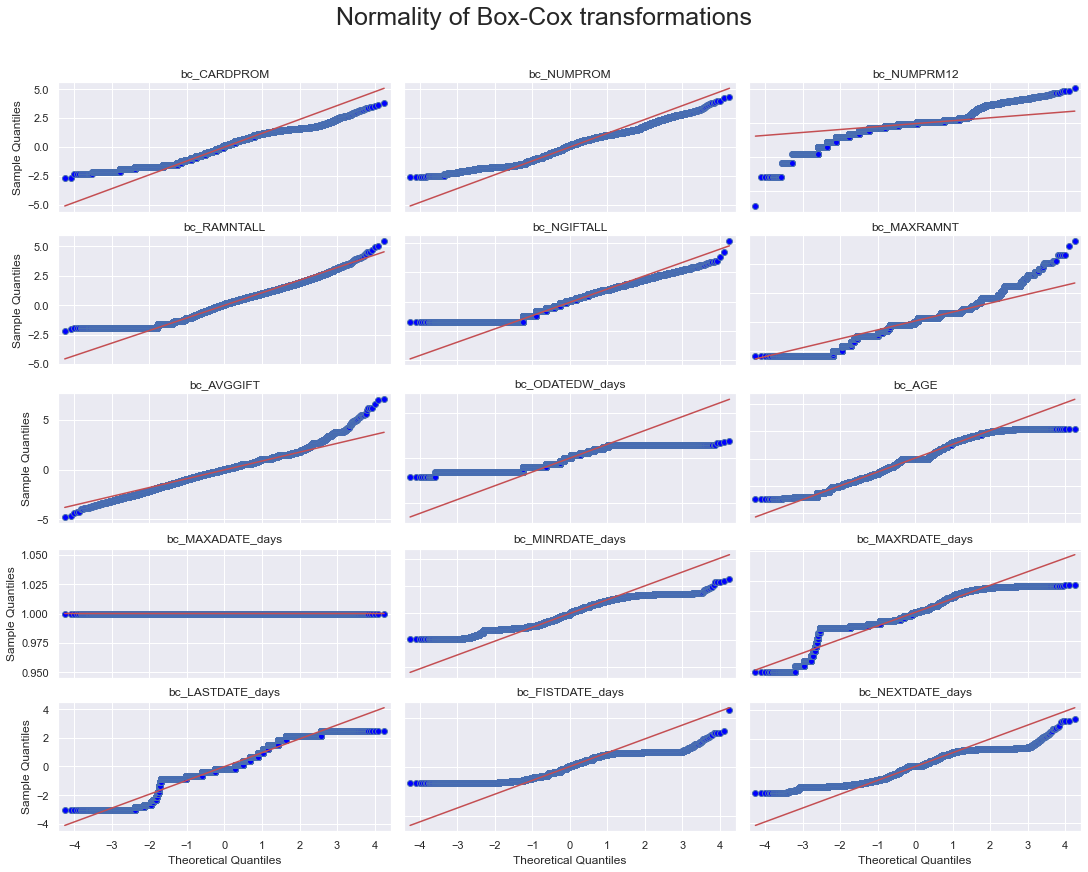

In [156]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(5,3, constrained_layout=True, figsize=(15,12))

fig.suptitle("Normality of Box-Cox transformations\n", fontsize=25)

for col, ax in zip(bc_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(109,3, constrained_layout=True, figsize=(15,12))

fig.suptitle("Normality of Yeo-Johnson transformations\n", fontsize=25)

for col, ax in zip(yj_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(5,3, constrained_layout=True, figsize=(15,12))

fig.suptitle("Normality of Quantile transformations\n", fontsize=25)

for col, ax in zip(qt_vars, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
# Verificar se isto ta dentro das linhas vermelhas! DAR RUN DAS 2 CÉLULAS DE CIMA!

# Univariate Outliers

In [164]:
def out_std(data, nstd=3.0, return_thresholds=False):
#nstd - number of standard deviations from the mean to consider an outlier
#return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 
    
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else:
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1) #return a boolean mask of outliers for a series using standard deviation

def out_iqr(data, k=1.5, return_thresholds=False):
#some cutoff to multiply by the iqr
#return_thresholds - True returns the lower and upper bounds, good for plotting; False returns the masked array 

    # calculate interquartile range
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else: # identify outliers
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1) #return a boolean mask of outliers for a series using interquartile range

In [202]:
outlier_labels = pd.concat([out_std(trans_df[yj_vars], 6.5), out_std(trans_df[qt_vars], 6.5)], axis=1)
outlier_labels.columns = ["outyjstd", "outqtstd"]

# Outlier removal - manually filtering by checking the boxplots